This notebook is used to analyse the model runs for no discharge and with discharge scenarios and to plot the original streamflow data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the weiherbach and schwarzbach data
#With discharge
#With discharge
file_path = rf"./seed_6697/y_obs_ungauged.csv"
y_obs = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_obs.set_index(y_obs.columns[0],inplace=True)
file_path = rf"./seed_average/y_sim_ungauged.csv"
y_sim = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_sim.set_index(y_sim.columns[0],inplace=True)
file_path = rf"../without_discharge_haicore/seed_average/y_sim_ungauged.csv"
y_sim_no_disch = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_sim_no_disch.set_index(y_sim_no_disch.columns[0],inplace=True)

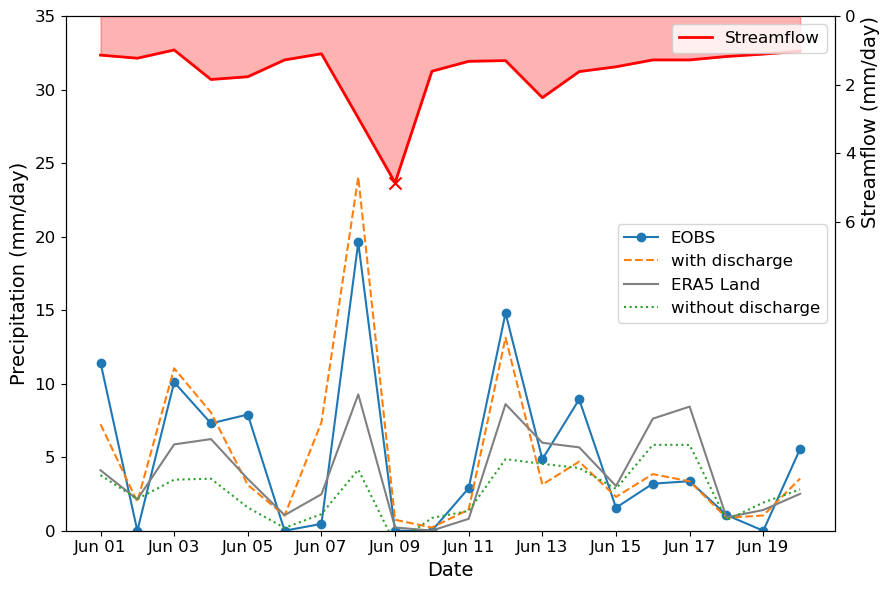

In [3]:
import matplotlib.dates as mdates
# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path,csv_path1, catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]

    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']
    era5_df_filtered = streamflow_df.loc[start_date:end_date, 'total_precipitation_sum']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(9, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='EOBS', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='with discharge', linestyle='--')
    ax1.plot(era5_df_filtered.index, era5_df_filtered, label='ERA5 Land', linestyle='-',color='grey')
    ax1.plot(y_sim_no_disch_filtered.index, y_sim_no_disch_filtered, label='without discharge', linestyle=':')
   

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Precipitation (mm/day)', fontsize=14)
    #ax1.set_title(f'Catchment: Elsenz Schwarzbach from {start_date} to {end_date}')
    ax1.legend(loc='center right', fontsize=12)
    ax1.set_ylim([0, 35])
    # Formatting tick labels
    ax1.tick_params(axis='both', labelsize=12)
    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.scatter(pd.to_datetime('2016-06-09'), streamflow_filtered.loc['2016-06-09'], color='red', s=75,marker='x', zorder=5)
    ax2.set_ylabel('Streamflow (mm/day)', loc='top', fontsize=14)
    ax2.legend(loc='upper right', fontsize=12)
    ax2.set_ylim([0, 15])
    ax2.set_yticks([0,2,4,6])
    ax2.tick_params(axis='both', labelsize=12)
    ax2.invert_yaxis()
   
    # Format the date labels on the x-axis
    date_format = mdates.DateFormatter('%b %d')
    ax1.xaxis.set_major_formatter(date_format)
    #fig.autofmt_xdate()  # Rotate date labels
    # Formatting the plot
    #plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.savefig("schwarzbach_event.jpeg",dpi=1200)
    # Show the plot
    plt.show()

# Example Usage
catchment = 'testde_2'  # Specify the column name corresponding to the catchment
csv_path = rf"testde_2.csv"
csv_path1 = rf"precip_eobs_schwarzbach.csv"
start_date = '2016-06-01'
end_date = '2016-06-20'

plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path,csv_path1, catchment, start_date, end_date)

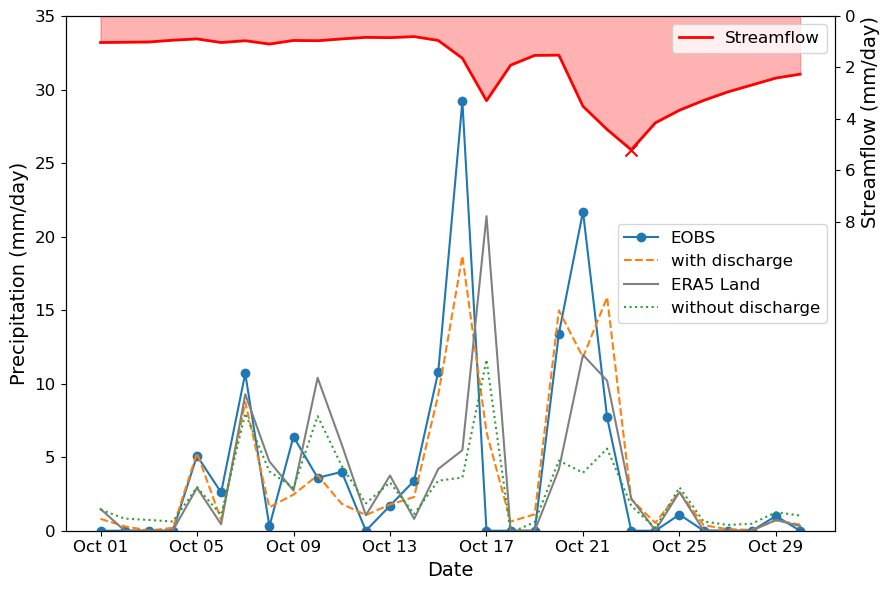

In [4]:
import matplotlib.dates as mdates
# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, csv_path1,  catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]

    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']
    era5_df_filtered = streamflow_df.loc[start_date:end_date, 'total_precipitation_sum']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(9, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='EOBS', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='with discharge', linestyle='--')
    ax1.plot(era5_df_filtered.index, era5_df_filtered, label='ERA5 Land', linestyle='-',color='grey')
    ax1.plot(y_sim_no_disch_filtered.index, y_sim_no_disch_filtered, label='without discharge', linestyle=':')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Precipitation (mm/day)', fontsize=14)
    ax1.legend(loc='center right', fontsize=12)
    #ax1.set_title(f'Catchment: Hoelzlebruck (camelsch_4003) from {start_date} to {end_date}')
    ax1.set_ylim([0, 35])
    ax1.tick_params(axis='both', labelsize=12)

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.scatter(pd.to_datetime('2014-10-23'), streamflow_filtered.loc['2014-10-23'], color='red', s=75,marker='x', zorder=5)
    ax2.set_ylabel('Streamflow (mm/day)', loc='top', fontsize=14)
    ax2.legend(loc='upper right', fontsize=12)
    ax2.set_ylim([0, 20])
    ax2.set_yticks([0,2,4,6,8])
    ax2.tick_params(axis='both', labelsize=12)
    ax2.invert_yaxis()

        # Format the date labels on the x-axis
    date_format = mdates.DateFormatter('%b %d')
    ax1.xaxis.set_major_formatter(date_format)
    #fig.autofmt_xdate()  # Rotate date labels
    # Formatting the plot
    #plt.xticks(rotation=45)
    plt.tight_layout()

    
    # Show the plot
    plt.savefig("camelsch_4003_event.jpeg",dpi=1200)
    plt.show()

# Example Usage
catchment = 'camelsch_4003'  # Specify the column name corresponding to the catchment
csv_path = rf".\{catchment}.csv"
csv_path1 = rf"precip_eobs_camelsch_4003.csv"
start_date = '2014-10-01'
end_date = '2014-10-30'

plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path,csv_path1, catchment, start_date, end_date)

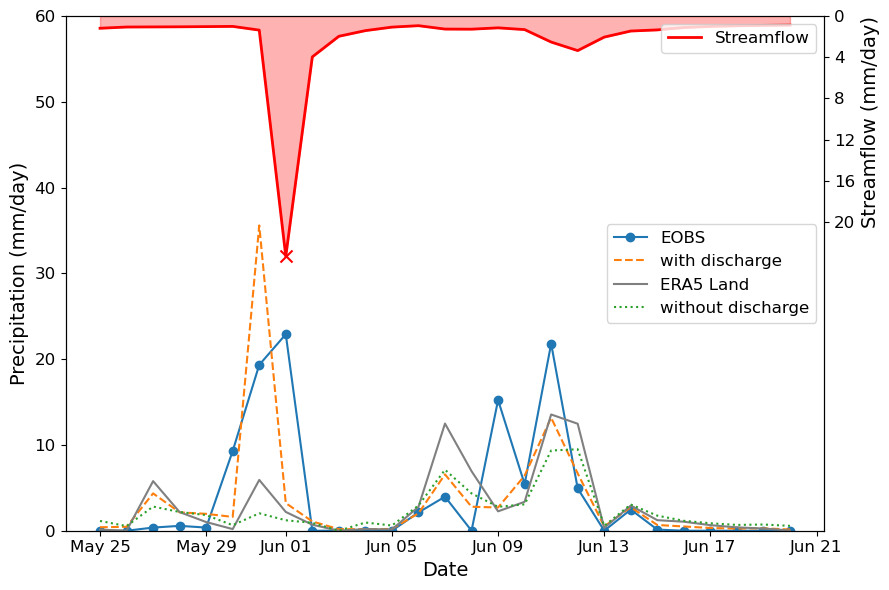

In [5]:
def plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, csv_path1,  catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]

    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']
    era5_df_filtered = streamflow_df.loc[start_date:end_date, 'total_precipitation_sum']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(9, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='EOBS', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='with discharge', linestyle='--')
    ax1.plot(era5_df_filtered.index, era5_df_filtered, label='ERA5 Land', linestyle='-',color='grey')
    ax1.plot(y_sim_no_disch_filtered.index, y_sim_no_disch_filtered, label='without discharge', linestyle=':')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Precipitation (mm/day)', fontsize=14)
    ax1.legend(loc='center right', fontsize=12)
    #ax1.set_title(f'Catchment: Ernz (camelslx_55) from {start_date} to {end_date}')
    ax1.tick_params(axis='both', labelsize=12)
    ax1.set_ylim([0, 60])

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.scatter(pd.to_datetime('2018-06-01'), streamflow_filtered.loc['2018-06-01'], color='red', s=75,marker='x', zorder=5)
    ax2.set_ylabel('Streamflow (mm/day)', loc='top', fontsize=14)
    ax2.legend(loc='upper right', fontsize=12)
    ax2.set_ylim([0, 50])
    ax2.set_yticks([0,4,8,12,16,20])
    ax2.tick_params(axis='both', labelsize=12)
    ax2.invert_yaxis()

    # Format the date labels on the x-axis
    date_format = mdates.DateFormatter('%b %d')
    ax1.xaxis.set_major_formatter(date_format)
    #fig.autofmt_xdate()  # Rotate date labels
    # Formatting the plot
    #plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.savefig("camelslx_055_event.jpeg",dpi=1200)
    plt.show()

catchment = 'camelslx_055' # Specify the column name corresponding to the catchment
csv_path = rf".\{catchment}.csv"
start_date = '2018-05-25'
end_date = '2018-06-20'
csv_path1 = rf"precip_eobs_camelslx_55.csv"

plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path,csv_path1, catchment, start_date, end_date)

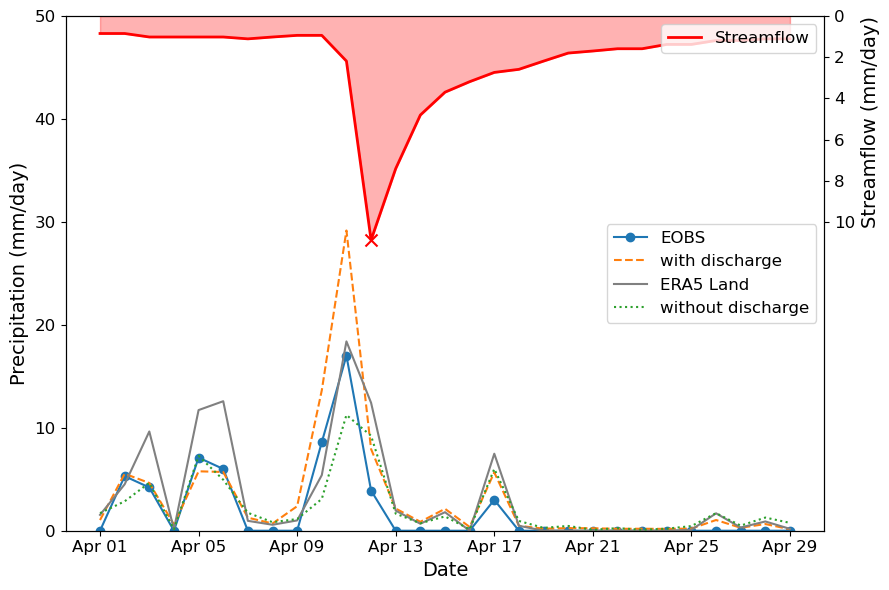

In [6]:
def plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, csv_path1,  catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]

    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']
    era5_df_filtered = streamflow_df.loc[start_date:end_date, 'total_precipitation_sum']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(9, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='EOBS', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='with discharge', linestyle='--')
    ax1.plot(era5_df_filtered.index, era5_df_filtered, label='ERA5 Land', linestyle='-',color='grey')
    ax1.plot(y_sim_no_disch_filtered.index, y_sim_no_disch_filtered, label='without discharge', linestyle=':')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Precipitation (mm/day)', fontsize=14)
    ax1.legend(loc='center right', fontsize=12)
    #ax1.set_title(f'Catchment: SUEIRO (camelses_1414) from {start_date} to {end_date}')
    ax1.set_ylim([0, 50])
    ax1.tick_params(axis='both', labelsize=12)

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.scatter(pd.to_datetime('2002-04-12'), streamflow_filtered.loc['2002-04-12'], color='red', s=75,marker='x', zorder=5)
    ax2.set_ylabel('Streamflow (mm/day)', loc='top', fontsize=14)
    ax2.legend(loc='upper right', fontsize=12)
    ax2.set_ylim([0, 25])
    ax2.set_yticks([0,2,4,6,8,10])
    ax2.tick_params(axis='both', labelsize=12)
    ax2.invert_yaxis()

    # Format the date labels on the x-axis
    date_format = mdates.DateFormatter('%b %d')
    ax1.xaxis.set_major_formatter(date_format)
    #fig.autofmt_xdate()  # Rotate date labels
    # Formatting the plot
    #plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.savefig("camelses_1414_event.jpeg",dpi=1200)
    plt.show()

# Example Usage
catchment = 'camelses_1414'  # Specify the column name corresponding to the catchment
csv_path = rf".\{catchment}.csv"
csv_path1 = rf"precip_eobs_camelses_1414.csv"
start_date = '2002-04-01'
end_date = '2002-04-29'

plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path,csv_path1, catchment, start_date, end_date)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc
from scipy.integrate import simps

In [20]:
def compute_event_areas(
    y_obs, y_sim, y_sim_no_disch, 
    catchment, start_date, end_date, 
    csv_path, baseflow_value=1.1
):
    """
    Compute area under the curve for observed, simulated (with/without discharge), 
    streamflow (adjusted), and ERA5 precipitation for a given catchment and event window.

    Parameters
    ----------
    y_obs : pd.DataFrame
        Observed values dataframe (index: datetime, columns: catchment names)
    y_sim : pd.DataFrame
        Simulated values with discharge (index: datetime, columns: catchment names)
    y_sim_no_disch : pd.DataFrame
        Simulated values without discharge (index: datetime, columns: catchment names)
    catchment : str
        Catchment column name
    start_date : str
        Start date (YYYY-MM-DD)
    end_date : str
        End date (YYYY-MM-DD)
    csv_path : str
        Path to CSV file with streamflow and ERA5 precipitation
    baseflow_value : float
        Value to subtract from streamflow for adjusted discharge

    Returns
    -------
    dict
        Dictionary with areas under the curve for each variable
    """
    import pandas as pd
    from sklearn.metrics import auc

    # Read streamflow and precipitation data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)

    # Filter all dataframes for the selected period and catchment
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']
    era5_filtered = streamflow_df.loc[start_date:end_date, 'total_precipitation_sum']

    # --- Discharge (streamflow) ---
    df_discharge = pd.DataFrame({'streamflow': streamflow_filtered})
    df_discharge['adjusted_discharge'] = df_discharge['streamflow'] - baseflow_value
    df_discharge['date'] = pd.to_datetime(df_discharge.index)
    df_discharge['days'] = (df_discharge['date'] - df_discharge['date'].min()).dt.days
    q_obs = auc(df_discharge['days'].values, df_discharge['adjusted_discharge'].values)

    # --- EOBS ---
    df_eobs = pd.DataFrame({catchment: y_obs_filtered})
    df_eobs['date'] = pd.to_datetime(df_eobs.index)
    x_eobs = (df_eobs['date'] - df_eobs['date'].min()).dt.days.values
    y_eobs = df_eobs[catchment].values
    p_eobs = auc(x_eobs, y_eobs)

    # --- With discharge (LSTM) ---
    df_lstm_with = pd.DataFrame({catchment: y_sim_filtered})
    df_lstm_with['date'] = pd.to_datetime(df_lstm_with.index)
    x_lstm_with = (df_lstm_with['date'] - df_lstm_with['date'].min()).dt.days.values
    y_lstm_with = df_lstm_with[catchment].values
    p_lstm_with = auc(x_lstm_with, y_lstm_with)

    # --- Without discharge (LSTM) ---
    df_lstm_without = pd.DataFrame({catchment: y_sim_no_disch_filtered})
    df_lstm_without['date'] = pd.to_datetime(df_lstm_without.index)
    x_lstm_without = (df_lstm_without['date'] - df_lstm_without['date'].min()).dt.days.values
    y_lstm_without = df_lstm_without[catchment].values
    p_lstm_without = auc(x_lstm_without, y_lstm_without)

    # --- ERA5 Precipitation ---
    df_era5 = pd.DataFrame({'total_precipitation_sum': era5_filtered})
    df_era5['date'] = pd.to_datetime(df_era5.index)
    x_era5 = (df_era5['date'] - df_era5['date'].min()).dt.days.values
    y_era5 = df_era5['total_precipitation_sum'].values
    p_era5 = auc(x_era5, y_era5)

    return {
        "q_obs": q_obs,
        "p_eobs": p_eobs,
        "p_lstm_with": p_lstm_with,
        "p_lstm_without": p_lstm_without,
        "p_era5": p_era5
    }

In [33]:
def compute_event_areas(
    y_obs, y_sim, y_sim_no_disch, 
    catchment, start_date, end_date, 
    csv_path, baseflow_value=1.1
):
    """
    Compute area under the curve for observed, simulated (with/without discharge), 
    streamflow (adjusted), and ERA5 precipitation for a given catchment and event window.
    Also prints each estimate and calculates runoff coefficients.

    Returns
    -------
    dict
        Dictionary with areas under the curve for each variable and runoff coefficients
    """
    import pandas as pd
    from sklearn.metrics import auc

    # Read streamflow and precipitation data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)

    # Filter all dataframes for the selected period and catchment
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']
    era5_filtered = streamflow_df.loc[start_date:end_date, 'total_precipitation_sum']

    # --- Discharge (streamflow) ---
    df_discharge = pd.DataFrame({'streamflow': streamflow_filtered})
    df_discharge['adjusted_discharge'] = df_discharge['streamflow'] - baseflow_value
    df_discharge['date'] = pd.to_datetime(df_discharge.index)
    df_discharge['days'] = (df_discharge['date'] - df_discharge['date'].min()).dt.days
    q_obs = auc(df_discharge['days'].values, df_discharge['adjusted_discharge'].values)

    # --- EOBS ---
    df_eobs = pd.DataFrame({catchment: y_obs_filtered})
    df_eobs['date'] = pd.to_datetime(df_eobs.index)
    x_eobs = (df_eobs['date'] - df_eobs['date'].min()).dt.days.values
    y_eobs = df_eobs[catchment].values
    p_eobs = auc(x_eobs, y_eobs)

    # --- With discharge (LSTM) ---
    df_lstm_with = pd.DataFrame({catchment: y_sim_filtered})
    df_lstm_with['date'] = pd.to_datetime(df_lstm_with.index)
    x_lstm_with = (df_lstm_with['date'] - df_lstm_with['date'].min()).dt.days.values
    y_lstm_with = df_lstm_with[catchment].values
    p_lstm_with = auc(x_lstm_with, y_lstm_with)

    # --- Without discharge (LSTM) ---
    df_lstm_without = pd.DataFrame({catchment: y_sim_no_disch_filtered})
    df_lstm_without['date'] = pd.to_datetime(df_lstm_without.index)
    x_lstm_without = (df_lstm_without['date'] - df_lstm_without['date'].min()).dt.days.values
    y_lstm_without = df_lstm_without[catchment].values
    p_lstm_without = auc(x_lstm_without, y_lstm_without)

    # --- ERA5 Precipitation ---
    df_era5 = pd.DataFrame({'total_precipitation_sum': era5_filtered})
    df_era5['date'] = pd.to_datetime(df_era5.index)
    x_era5 = (df_era5['date'] - df_era5['date'].min()).dt.days.values
    y_era5 = df_era5['total_precipitation_sum'].values
    p_era5 = auc(x_era5, y_era5)

    # Runoff coefficients
    runoff_coeff_era5 = q_obs / p_era5 if p_era5 != 0 else float('nan')
    runoff_coeff_with = q_obs / p_lstm_with if p_lstm_with != 0 else float('nan')
    runoff_coeff_eobs = q_obs / p_eobs if p_eobs != 0 else float('nan')
    runoff_coeff_without = q_obs / p_lstm_without if p_lstm_without != 0 else float('nan')

    # Print all values rounded to 2 decimals in the requested order
    print(f"Catchment: {catchment} | Period: {start_date} to {end_date}")
    print(f"  Area under ERA5 precipitation curve (ERA5 Land): {p_era5:.2f}")
    print(f"  Area under LSTM with discharge curve (with_discharge): {p_lstm_with:.2f}")
    print(f"  Area under LSTM without discharge curve (without_discharge): {p_lstm_without:.2f}")
    print(f"  Area under EOBS curve (E-OBS): {p_eobs:.2f}")
    print(f"  Area under adjusted discharge curve (streamflow): {q_obs:.2f}")
    print(f"  Runoff coefficient (ERA5 Land): {runoff_coeff_era5:.2f}")
    print(f"  Runoff coefficient (with_discharge): {runoff_coeff_with:.2f}")
    print(f"  Runoff coefficient (without_discharge): {runoff_coeff_without:.2f}")
    print(f"  Runoff coefficient (E-OBS): {runoff_coeff_eobs:.2f}")

    return {
        "p_era5": round(p_era5, 2),
        "p_lstm_with": round(p_lstm_with, 2),
        "p_lstm_without": round(p_lstm_without, 2),
        "p_eobs": round(p_eobs, 2),
        "q_obs": round(q_obs, 2),
        "runoff_coeff_era5": round(runoff_coeff_era5, 2),
        "runoff_coeff_with": round(runoff_coeff_with, 2),
        "runoff_coeff_without": round(runoff_coeff_without, 2),
        "runoff_coeff_eobs": round(runoff_coeff_eobs, 2)
    }

In [34]:
#Elsenz Schwarbach
areas = compute_event_areas(
    y_obs, y_sim, y_sim_no_disch,
    catchment='testde_2',
    start_date='2016-06-06',
    end_date='2016-06-10',
    csv_path='testde_2.csv'
)
print(areas)

Catchment: testde_2 | Period: 2016-06-06 to 2016-06-10
  Area under ERA5 precipitation curve (ERA5 Land): 12.51
  Area under LSTM with discharge curve (with_discharge): 32.79
  Area under LSTM without discharge curve (without_discharge): 4.92
  Area under EOBS curve (E-OBS): 20.07
  Area under adjusted discharge curve (streamflow): 5.98
  Runoff coefficient (ERA5 Land): 0.48
  Runoff coefficient (with_discharge): 0.18
  Runoff coefficient (without_discharge): 1.21
  Runoff coefficient (E-OBS): 0.30
{'p_era5': 12.5, 'p_lstm_with': 32.79, 'p_lstm_without': 4.92, 'p_eobs': 20.07, 'q_obs': 5.98, 'runoff_coeff_era5': 0.48, 'runoff_coeff_with': 0.18, 'runoff_coeff_without': 1.21, 'runoff_coeff_eobs': 0.3}


In [35]:
#Ernz
areas = compute_event_areas(
    y_obs, y_sim, y_sim_no_disch,
    catchment='camelslx_055',
    start_date = '2018-05-29',
    end_date = '2018-06-04',
    csv_path='camelslx_055.csv',baseflow_value=1
)
print(areas)

Catchment: camelslx_055 | Period: 2018-05-29 to 2018-06-04
  Area under ERA5 precipitation curve (ERA5 Land): 9.60
  Area under LSTM with discharge curve (with_discharge): 42.75
  Area under LSTM without discharge curve (without_discharge): 6.20
  Area under EOBS curve (E-OBS): 51.72
  Area under adjusted discharge curve (streamflow): 26.88
  Runoff coefficient (ERA5 Land): 2.80
  Runoff coefficient (with_discharge): 0.63
  Runoff coefficient (without_discharge): 4.34
  Runoff coefficient (E-OBS): 0.52
{'p_era5': 9.6, 'p_lstm_with': 42.75, 'p_lstm_without': 6.2, 'p_eobs': 51.72, 'q_obs': 26.88, 'runoff_coeff_era5': 2.8, 'runoff_coeff_with': 0.63, 'runoff_coeff_without': 4.34, 'runoff_coeff_eobs': 0.52}


In [36]:
#Sueiro
areas = compute_event_areas(
    y_obs, y_sim, y_sim_no_disch,
    catchment='camelses_1414',
     start_date = '2002-04-07',
    end_date = '2002-04-15',
    csv_path='camelses_1414.csv',baseflow_value=0.9
)
print(areas)

Catchment: camelses_1414 | Period: 2002-04-07 to 2002-04-15
  Area under ERA5 precipitation curve (ERA5 Land): 41.81
  Area under LSTM with discharge curve (with_discharge): 58.53
  Area under LSTM without discharge curve (without_discharge): 29.46
  Area under EOBS curve (E-OBS): 29.50
  Area under adjusted discharge curve (streamflow): 23.39
  Runoff coefficient (ERA5 Land): 0.56
  Runoff coefficient (with_discharge): 0.40
  Runoff coefficient (without_discharge): 0.79
  Runoff coefficient (E-OBS): 0.79
{'p_era5': 41.81, 'p_lstm_with': 58.53, 'p_lstm_without': 29.46, 'p_eobs': 29.5, 'q_obs': 23.4, 'runoff_coeff_era5': 0.56, 'runoff_coeff_with': 0.4, 'runoff_coeff_without': 0.79, 'runoff_coeff_eobs': 0.79}


In [37]:
#Hoelzlebruck
areas = compute_event_areas(
    y_obs, y_sim, y_sim_no_disch,
    catchment='camelsch_4003',
start_date = '2014-10-18',
end_date = '2014-10-30',
    csv_path='camelsch_4003.csv',baseflow_value=1.52
)
print(areas)

Catchment: camelsch_4003 | Period: 2014-10-18 to 2014-10-30
  Area under ERA5 precipitation curve (ERA5 Land): 32.12
  Area under LSTM with discharge curve (with_discharge): 50.85
  Area under LSTM without discharge curve (without_discharge): 22.92
  Area under EOBS curve (E-OBS): 44.90
  Area under adjusted discharge curve (streamflow): 19.14
  Runoff coefficient (ERA5 Land): 0.60
  Runoff coefficient (with_discharge): 0.38
  Runoff coefficient (without_discharge): 0.84
  Runoff coefficient (E-OBS): 0.43
{'p_era5': 32.12, 'p_lstm_with': 50.85, 'p_lstm_without': 22.92, 'p_eobs': 44.9, 'q_obs': 19.14, 'runoff_coeff_era5': 0.6, 'runoff_coeff_with': 0.38, 'runoff_coeff_without': 0.84, 'runoff_coeff_eobs': 0.43}
